## Fundamentals of Data Analysis Project

**Francesco Troja**

***

#### Project

>Create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.
>
>• In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics,>statistics, and Python.
>
>• Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
>
>• Select, demonstrate, and explain the most appropriate plot(s) for each variable.
>
>• The notebook should follow a cohesive narrative about the dataset.

#### Import Python Libraries

To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:
1. `padas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Fisher's Iris Data set History

The **Iris flower** dataset, also known as *Fisher's Iris* dataset, was introduced by British biologist and statistician Sir **Ronald Aylmer Fisher** in his 1936 article titled "*The Use of Multiple Measurements in Taxonomic Problems*". Additionally, the data set is sometimes referred to as *Anderson's Iris dataset*, as **Edgar Anderson** collected the data to quantify the morphological variation among *Iris flowers* from three related species. The collection process involved gathering two of the three species in the *Gaspé Peninsula* [2], 

>all from the same pasture, on the same day, and measuring them simultaneously using the same apparatus by the same person (ANDERSON, 1935, p. 1306),

while for the Virgica species:

> Some of my earliest experiences with species iris were with Iris setosa. Before setosa, though, was the "versicolor," growing in our front yard when we moved here almost 40 years ago (we later learned this was I. virginica var. Shrevei, and thanks to the daughter who dug me a clump for Mother's Day before the low area was filled, I still have that one) (ANDERSON, 1935, p. 1312).

In his paper, Fisher introduces the concept of **linear discriminant analysis** (LDA), a statistical method employed for dimensionality reduction and classification. The primary objective of LDA is to identify a linear combination of features that maximizes the separation between different classes while minimizing the variation within each class. Fisher's specific goal was to discover a linear combination of features that effectively characterizes or discriminates between two or more classes. To illustrate his approach, Fisher utilized the Iris dataset, which comprises measurements of `sepal length`, `sepal width`, `petal length`, and `petal width` for three species of iris flowers, `setosa`, `versicolor`, and `virginica` (refer below image). This dataset served as a practical example for demonstrating LDA. Fisher applied LDA to the iris dataset with the intention of differentiating between the three iris species. By analyzing the linear discriminants, he aimed to identify the features that contribute the most to the separation of the species[3].

<center>

<img src=https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png width="500">

</center>

#### Reading Dataset


When dealing with *datasets* in Python, there are multiple methods for importing data, providing a flexible approach. One common strategy is utilizing the *Pandas library* to directly import the dataset from its online source. This involves employing the `pandas.read_csv()` function to read the data directly from the provided *URL*. Alternatively, the dataset can be downloaded and *stored locally* as a *CSV file*. Subsequently, the data can be read from the CSV file by specifying its local file path. Both methods facilitate convenient access to the dataset. The choice between these approaches may depend on factors such as network connectivity and the requirement for offline access to the dataset. In this context, the **csv_url** variable is employed to store the URL of the Iris dataset, which is accessible from the [**UC Irvine Machine Learning Repository**](https://archive.ics.uci.edu/dataset/53/iris) [4].

In [2]:
# store the dataset link in a variable
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url)

print('Find below the Iris Dataset:\n')
iris

Find below the Iris Dataset:



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


#### Exploratory Data Analysis


The *Iris dataset* displayed above reveals a remarkable issue: the attribute names information is not included in the main file from the *UCI Machine Learning Repository*. Instead, this information is stored in a separate file located in the **[iris.names](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names)** section. This additional file offers essential information regarding the four measurement attributes (**sepal length in cm**, **sepal width in cm**, **petal length in cm**, **petal width in cm**) and the three distinct classes (**Iris Setosa**, **Iris Versicolor**, and **Iris Virginica**). This attribute information is crucial for accurately interpreting and understanding the dataset's contents, providing context for each attribute's significance and contributing to a more comprehensive analysis. To enhance accessibility and readability, the file containing attribute names has been added to the repository. This additional step ensures that essential attribute information is readily available for a comprehensive understanding of the dataset.

To overcome the issue of missing attribute names in the dataset, the `read_csv()` function provides an argument called `names`, which allows users to specify a list of names to be used for the columns in the DataFrame. In the case of the present dataset, a list named **attribute_names** has been created, containing the attribute names. This list is then passed as an argument to the `names` parameter of the `read_csv()` function, ensuring that the specified names are used for the DataFrame columns instead of relying on the first row in the CSV file as the header row[5].

In [3]:
# Define the names of the columns in the dataset
attribute_names = ['Sepal_Length (cm)', 'Sepal_Width (cm)', 'Petal_Length (cm)', 'Petal_Width (cm)', 'Class']
iris = pd.read_csv(csv_url, names = attribute_names)

print('Modifying the attribute names in the dataset:\n')
iris


Modifying the attribute names in the dataset:



,Sepal_Length (cm),Sepal_Width (cm),Petal_Length (cm),Petal_Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The dataset's structure and characteristics can be explored through statistical analysis. Insights into the data, including the number of rows and columns, values, data types, and missing values, are crucial for a comprehensive understanding. Utilizing the Pandas `head()` method provides a view of the top rows (default is 5), while the `tail()` method showcases the bottom rows (default is 5), aiding in initial exploration and assessment[6].

In [4]:
print('the first 5 rows of the dataset:')
iris.head()

the first 5 rows of the dataset:


,Sepal_Length (cm),Sepal_Width (cm),Petal_Length (cm),Petal_Width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print('the last 10 rows of the dataset:')
iris.tail(10)

the last 10 rows of the dataset:


,Sepal_Length (cm),Sepal_Width (cm),Petal_Length (cm),Petal_Width (cm),Class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


As evident from the provided code, the selected dataset comprises **150 rows** and **5 columns**. The dimensionality of the dataset, can be confirmed using the Pandas function `shape` that when used it returns a tuple where the first element represents the number of rows (observations) and the second element indicates the number of columns (variables) in the dataset[7].

In [6]:
print(f'The dimensions of the dataset are: {iris.shape}')
print(f'The number of row are: {iris.shape[0]}')
print (f'The number of Attributes are: {iris.shape[1]}')

The dimensions of the dataset are: (150, 5)
The number of row are: 150
The number of Attributes are: 5


Let's explore the dataset further by utilizing the `info()` function provided by the *pandas library*. This function offers a concise **summary of the dataset**, presenting details such as *column data types*, the count of *non-null values* in each column, and the overall *memory usage*. The `info()` function prints the generated summary that will provide with essential insights into the structure and characteristics of the iris dataset[8].

In [7]:
print('Please show the concise summary of the Dataset:\n')
iris.info()

Please show the concise summary of the Dataset:



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal_Length (cm)  150 non-null    float64
 1   Sepal_Width (cm)   150 non-null    float64
 2   Petal_Length (cm)  150 non-null    float64
 3   Petal_Width (cm)   150 non-null    float64
 4   Class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The summary of the dataset indicates that it comprises **5 columns** with a *mix of data types*. Specifically, **4 attributes** (Sepal/Petal Length, Sepal/Petal Width) have the data type *float*, while **1 attribute** (Class) has the data type *object*. The distinction between these data types lies in their representation: generally, **float** refers to *numerical values with decimal points*, while **object** can encompass various data types, including *strings* or *mixed* types[9]. 

Another *important step* in comprehending the dataset is to assess not only the presence of **missing values** but also identify **duplicate rows**. To show the count of rows with null values, the `isnull()` function is employed. This function marks the occurrences of missing or null values within the dataset. To ascertain the specific number of missing values for each variable, the `sum()` function can be applied in conjunction with the `isnull()` function[10].

In [8]:
print('The missing values are:')
iris.isnull().sum()

The missing values are:


Sepal_Length (cm)    0
Sepal_Width (cm)     0
Petal_Length (cm)    0
Petal_Width (cm)     0
Class                0
dtype: int64

The presence of duplicate rows in the dataset is assessed using the `duplicated()` function in conjunction with `sum()`[11].

In [9]:
print(f'The number of Duplicated Rows is: {iris.duplicated().sum()}')


The number of Duplicated Rows is: 3


The analysis outcome indicates that there are **no missing values** within the dataset, but there are **3 duplicate rows**. Handling duplicate rows is crucial, and the appropriate action depends on the analysis's goals. Options include removing the duplicate rows or employing other strategies to ensure the dataset's accuracy and suitability for the intended analysis. Depending on the context and requirements, decisions on how to manage duplicates should align with maintaining data integrity and achieving the analysis objectives.

#### Variable Types

Having unveiled the dataset's surface, it's time to delve deeper into the analysis and exploring the characteristics of different variables within the dataset. In a dataset, *two types* of variables exist, namely **Categorical** Variables and **Numerical** Variables and understanding the distinction between them is crucial, as it affects the choice of analytical methods and visualization techniques.

#### Categorical Variables

**Categorical variables** represent *categories* or *groups*. These categories can be **Nominal**, **Ordinal** or **Binary**. *Nominal categories* have *no inherent order* (e.g., colors, types of fruit), *ordinal categories* have a *meaningful order* (e.g., education levels, customer satisfaction ratings), while binary variables, also known as *dichotomous variables*, represent information in a *yes/no* or *true/false* format. Exploring categorical variables requires an in-depth analysis that encompasses various methods. This typically involves conducting a frequency analysis to count the occurrences of each category, calculating the corresponding percentages, and employing visualizations like bar charts, pie charts, and stacked bar charts for enhanced understanding and representation of the data distribution. These visualizations serve as effective tools in disclose the composition and proportions of different categories within the dataset[12].

The Pandas `unique()` function is a handy tool for identifying and extracting *distinct values* within a categorical variable in a dataset. When applied to a specific column, it returns an *array* containing the unique values present in that column. In the given dataset, the only categorical variable is **"Class"**. Let's examine this variable and explore the unique values it contains:

In [10]:
print(f"The unique values for the Class attribute are: {iris['Class'].unique()}")

The unique values for the Class attribute are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


the code has affirmed the presence of three distinct classes in the Iris dataset, namely:

- Setosa
- Versicolor
- Virginica


To better understand the **distribution** of these classes within the dataset and ascertain whether they are balanced, we can utilize the `value_counts()` function in Python. This function provides the *count of unique values* for a categorical variable, offering insights into the distribution of each category.

In [11]:
print("Distribution of the 3 Iris Flowr in the dataset: \n")
print(iris["Class"].value_counts())

Distribution of the 3 Iris Flowr in the dataset: 

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


The categorical variable **"Class"** in the iris dataset exhibits a *balanced distribution*, with each class ("setosa," "versicolor," and "virginica") having an *equal number of entries*. This balanced distribution is beneficial for certain analyses as it ensures that each class is adequately represented in the dataset, minimizing potential biases in the results.

Let's proceed with **visualizing** the categorical variable "Class" in the iris dataset using three different chart types: **Pie Chart** and **Column Bar Chart**:

**Pie charts** are used as visualization tool for displaying the distribution of categorical data. They represent parts of a whole and are effective for illustrating proportions or percentages within a dataset. Each slice of the pie corresponds to a specific category, and the size of the slice is proportional to the relative frequency or percentage of that category in the dataset[13].

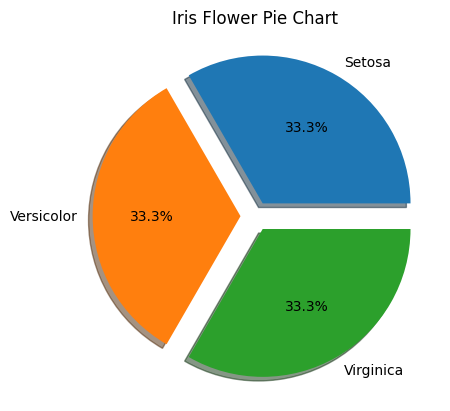

In [12]:
#creating a Pie chart
fig, ax = plt.subplots()
# autopct: display the percentage of each segment
ax.pie(iris['Class'].value_counts(),labels= ['Setosa', 'Versicolor', 'Virginica'], autopct='%1.1f%%',explode= [0.1,0.1,0.1], shadow =True)
plt.title('Iris Flower Pie Chart')
#plt.savefig('Pie Chart for Class Attribute.png')
plt.show()

**Bar graph** is a visual representation of data that uses rectangular bars to show the values of different categories. In a bar graph, one axis typically represents the categories or labels, while the other axis represents the numerical values or counts associated with each category. The length or height of each bar corresponds to the magnitude of the data it represents. Bar graphs can be plotted either vertically or horizontally, depending on the orientation that best suits the presentation of the data[14].

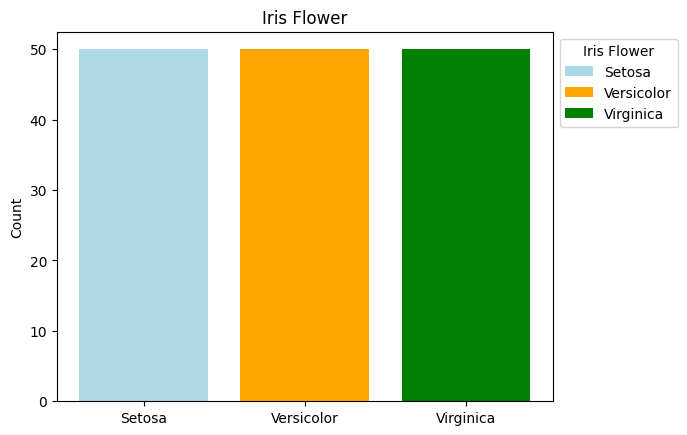

In [13]:
fig, ax = plt.subplots()
bar_labels = ['Setosa', 'Versicolor', 'Virginica']
class_counts = iris['Class'].value_counts()


ax.bar(bar_labels, class_counts, color=['lightblue', 'orange', 'green'], label=bar_labels)
ax.set_ylabel('Count')
ax.set_title('Iris Flower')
ax.legend(title='Iris Flower', bbox_to_anchor=(1, 1), loc='upper left')
#plt.savefig('Bar chart for Class Attribute.png)
plt.show()



#### Numerical Variables

Now that we have a clear understanding of the categorical variable 'Class' and its distribution in the Iris dataset, let's proceed with the **analysis of numerical variables**. *Numerical variables* can be explored through various *statistical measures* and *visualizations* to gain insights into their characteristics and relationships. One way to begin the exploration of numerical variables is to use **descriptive statistics** to summarize their *central tendency*, *dispersion*, and *shape* of the distribution. The Pandas `describe()` method is a handy tool for this purpose, providing key statistics such as *mean* (indicating the data's average), *standard deviation* (measuring the data's spread), *minimum* (identifying the smallest observed value for each variable), *25th/50th/75th percentile* (demonstrating the values below certain percentiles), and *maximum* (revealing the largest observed value for each variable)[15]. 

Let's apply this method to the numerical columns of the Iris dataset: **sepal_length_cm**, **sepal_width_cm**, **petal_length_cm**, and **petal_width_cm**



In [14]:
print('Statistical summary of the dataset: ')
iris.describe()

Statistical summary of the dataset: 


,Sepal_Length (cm),Sepal_Width (cm),Petal_Length (cm),Petal_Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The statistical summary provides valuable insights into the numerical attributes of the dataset. The mean sepal length is indeed 5.8 cm, which seems to be higher compared to the mean of the other three measurements. Petal length has the highest deviation (1.76 cm) and sepal width has the smallest (0.43 cm). The percentiles give an idea about the distribution of the data: For example, 50% of the observations have Sepal Length between 5.1 cm and 6.4 cm.

Now, let's visualize the distribution of numerical variables using histograms. A **histogram** is a graphical representation that illustrates the *distribution of data* by dividing the range of the data into bins and then drawing bars to depict the number of observations within each bin. This visualization method utilizes adjacent rectangular bars to showcase either the frequency or relative frequency of measurements falling within specific intervals. Each interval, also known as a bin, represents a range of values. The number of bins can be explicitly defined, but tools like **seaborn** and **matplotlib** often automatically determine an appropriate number. The selection of the number of bins is typically influenced by the dataset size and the distribution's shape. Histograms provide a visual representation of the central tendency and spread of the data, allowing the observation of any skewness in the dataset. For visualizing the histogram, the `distplot()` method from the seaborn library will be employed. This method proves effective for various reasons, such as providing insights into the central tendency and spread of the distribution while also indicating the presence of any skewness in the data[16].

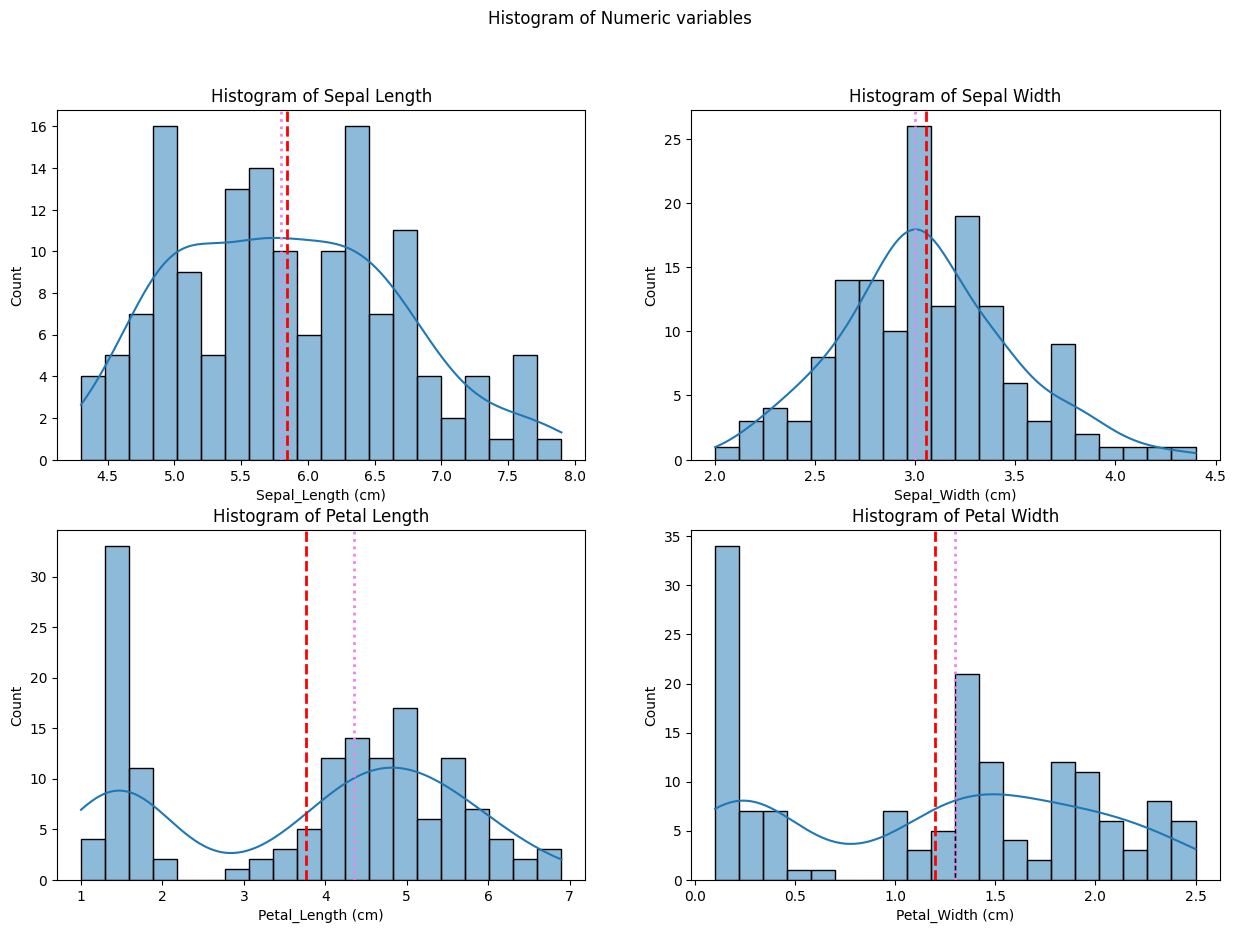

In [15]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create the histograms using sns.displot
hist1 = sns.histplot(iris, kde=True, x='Sepal_Length (cm)', bins=20, ax=axes[0,0])
hist2 = sns.histplot(iris, kde=True, x='Sepal_Width (cm)', bins=20, ax=axes[0,1])
hist3 = sns.histplot(iris, kde=True, x='Petal_Length (cm)', bins=20, ax=axes[1,0])
hist4 = sns.histplot(iris, kde=True, x='Petal_Width (cm)', bins=20, ax=axes[1,1])



# Add vertical lines to the histograms using axvline
hist1.axvline(iris['Sepal_Length (cm)'].mean(), color='red', linewidth=2, linestyle="--")
hist1.axvline(iris['Sepal_Length (cm)'].quantile(q=0.5), color='violet', linewidth=2, linestyle=":")

hist2.axvline(iris['Sepal_Width (cm)'].mean(), color='red', linewidth=2, linestyle="--")
hist2.axvline(iris['Sepal_Width (cm)'].quantile(q=0.5), color='violet', linewidth=2, linestyle=":")

hist3.axvline(iris['Petal_Length (cm)'].mean(), color='red', linewidth=2, linestyle="--")
hist3.axvline(iris['Petal_Length (cm)'].quantile(q=0.5), color='violet', linewidth=2, linestyle=":")

hist4.axvline(iris['Petal_Width (cm)'].mean(), color='red', linewidth=2, linestyle="--")
hist4.axvline(iris['Petal_Width (cm)'].quantile(q=0.5), color='violet', linewidth=2, linestyle=":")

# Set titles
axes[0,0].set_title("Histogram of Sepal Length")
axes[0,1].set_title("Histogram of Sepal Width")
axes[1,0].set_title("Histogram of Petal Length")
axes[1,1].set_title("Histogram of Petal Width")

plt.suptitle('Histogram of Numeric variables')
#plt.savefig('Raw data for Iris dataset.png')
plt.show()


In the analysis of the Iris dataset, distinct patterns emerge from the histograms of the numerical features.  Both sepal length and width exhibit distributions that are approximately normal, with the sepal width histogram displaying a slight right skewness, indicating a higher occurrence of flowers with wider sepals. In contrast, the histograms for petal length and petal width show positive skewness. The mean petal length is 1.32 cm with a standard deviation of 0.41 cm, while the mean petal width is 0.26 cm with a standard deviation of 0.16 cm. This suggests a prevalence of flowers with longer petals in the dataset. Notably, petal lengths reveal a distinct separation, indicating the presence of a subgroup with significantly smaller measurements. A similar separation is observed in the distribution of petal widths, further emphasizing this subgroup. Sepal widths, on the other hand, are predominantly concentrated around 3 cm, with discernible smaller peaks on either side of this central value.

For a more detailed exploration, the `distplot()` function offers an additional parameter called `hue`. This parameter proves useful when visualizing the distribution of numerical features across distinct classes of iris flowers. The incorporation of the hue parameter allows the **creation of separate distributions for each class**. This facilitates the observation of variations in numerical features across different species. The approach provides insights into potential distinctive patterns or characteristics unique to each iris class. By visualizing histograms for each class side by side, one can make a direct comparison of feature distributions, aiding in the identification of differences or similarities between species.

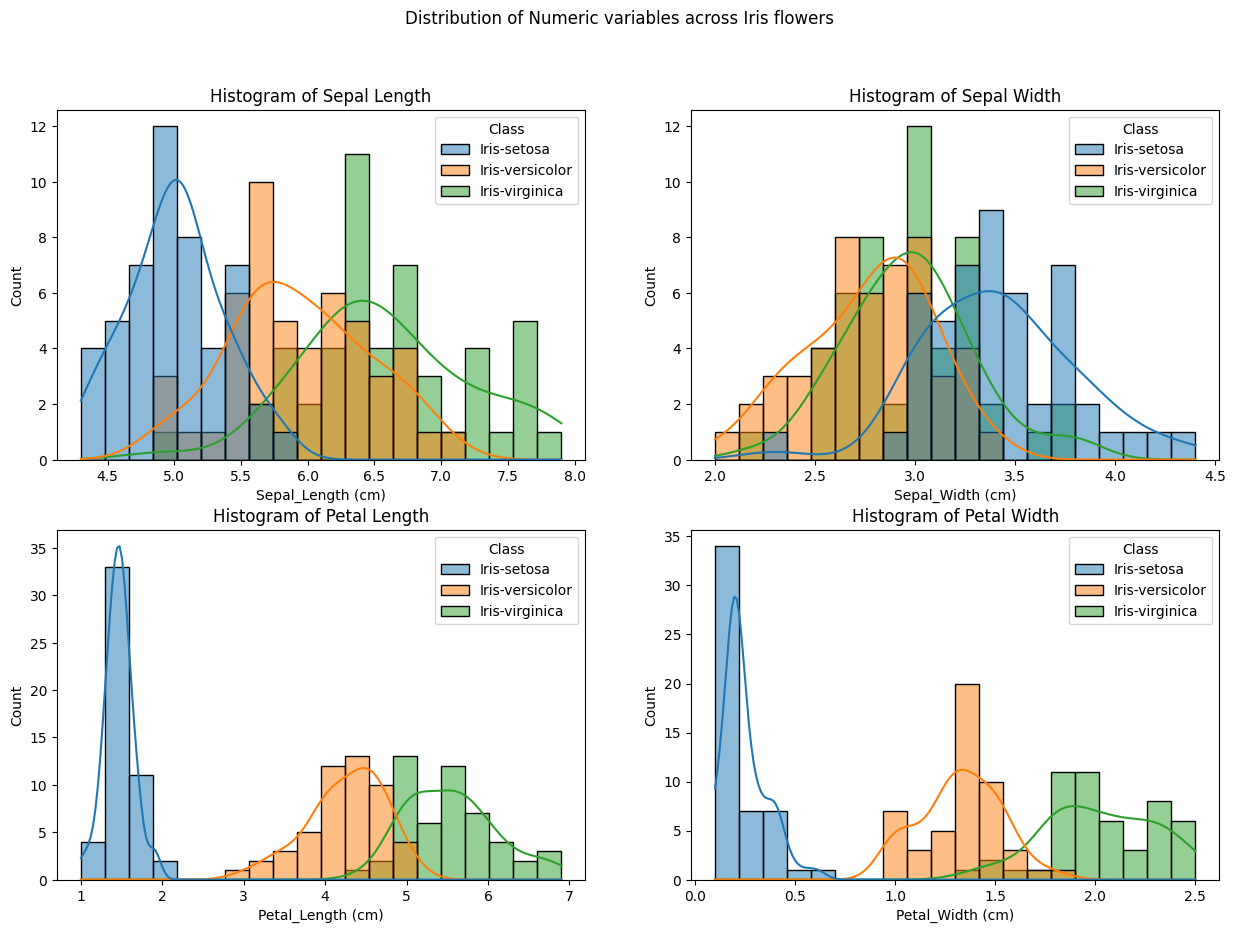

In [16]:
f, axes = plt.subplots(2, 2, figsize=(15, 10))

# Create the histograms using sns.displot
hist1 = sns.histplot(iris, kde=True, x='Sepal_Length (cm)', hue= 'Class', bins=20, ax=axes[0,0])
hist2 = sns.histplot(iris, kde=True, x='Sepal_Width (cm)',hue= 'Class',  bins=20, ax=axes[0,1])
hist3 = sns.histplot(iris, kde=True, x='Petal_Length (cm)',hue= 'Class',  bins=20, ax=axes[1,0])
hist4 = sns.histplot(iris, kde=True, x='Petal_Width (cm)',hue= 'Class',  bins=20, ax=axes[1,1])

# Set titles
axes[0,0].set_title("Histogram of Sepal Length")
axes[0,1].set_title("Histogram of Sepal Width")
axes[1,0].set_title("Histogram of Petal Length")
axes[1,1].set_title("Histogram of Petal Width")

plt.suptitle('Distribution of Numeric variables across Iris flowers')
#plt.savefig('Distribution of Numeric variables across Iris flowers.png')
plt.show()

As evidenced by the histograms presented above, distinctions in the distributions of all four variables are observable across the three species of iris flowers. Taking the **Petal attribute** as an example, an *overlap* is apparent between the **Petal Length and Width** of *iris versicolor and virginica*, while iris setosa stands out as distinct from the other two species. Notably, the distribution of Petal Length for each species exhibits significant differences. Setosa's distribution, in particular, displays a shape with the highest peak, while the distributions for versicolor and virginica are more dispersed. In contrast, the sepal histograms portray a different scenario, with a noticeable amount of overlap among all three species for both sepal length and width.

An alternative method for visualizing numerical variables is through the use of boxplots. **Boxplots** provide a standardized representation of the distribution of a dataset based on its **five-number summary**: the *minimum*, *first quartile* (Q1), *median*, *third quartile* (Q3), and *maximum*. These visualizations offer insights into the presence of outliers, the symmetry of data (if the median is in the centre of the box and the whiskers are the same length), the tightness of data grouping, and the skewness of the dataset. A boxplot is depicted as a box with a vertical line down the middle, accompanied by horizontal lines known as whiskers. The box represents the interquartile range (IQR), signifying the 50 percent of data points lying between Q1 and Q3. Whiskers convey the variability of the minimum, maximum, and any outlier data points concerning the IQR. Whiskers help identify outlier values that lie beyond the typical data range. These visualizations are valuable for understanding data spread and identifying potential anomalies or deviations from the norm[17].

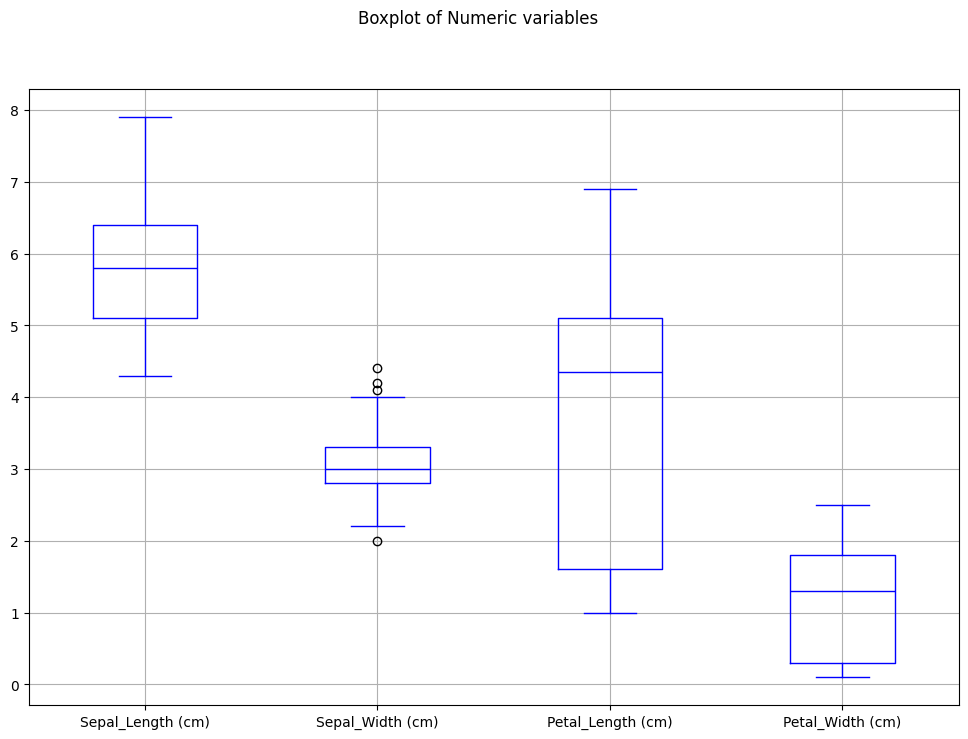

In [17]:
plt.figure(figsize = (12, 8)) 
iris.boxplot(color='blue')
plt.suptitle('Boxplot of Numeric variables')
#plt.savefig('Boxplot of Numeric variables.png')
plt.show()

The interquartile range (middle 50%) of sepal lengths ranges from 5.1 cm to 6.4 cm. Outliers above 7.9 cm and below 3.5 cm are observed in the sepal length distribution. Similarly, the interquartile range of sepal widths falls between 4.9 cm and 6.3 cm, with outliers above 6.6 cm and below 2.0 cm. For petal lengths, 50% of the values fall within the range of 2.5 cm to 3.5 cm. Outliers are present above 6.9 cm and below 1.0 cm in the petal length distribution. In the case of petal widths, the interquartile range spans from 1.1 cm to 1.5 cm, and outliers are observed above 2.5 cm and below 0.1 cm. The boxplots illustrate that the distributions of all four numeric variables in the Iris dataset are unimodal and approximately normal, with some skewness evident in the petal width distribution. 

Following the comprehensive analysis of both categorical and numerical variables, the next step involves summarizing the entire dataset. **Seaborn**'s `pairplot` proves to be a valuable tool for this task, providing a visual representation of all **pairwise relationships** among variables in the dataset. This visualization aids in understanding the data by condensing a substantial amount of information into a single figure. The pairplot displays univariate distributions along the diagonal and illustrates relationships between pairs of variables in other areas. Leveraging the **hue parameter**, different levels of a categorical variable can be depicted by color against the numerical variables. This visual summary can guide further insights and decision-making in the subsequent stages of the analysis or project[18].

Text(0.5, 1.0, 'Pairplot of Iris dataset')

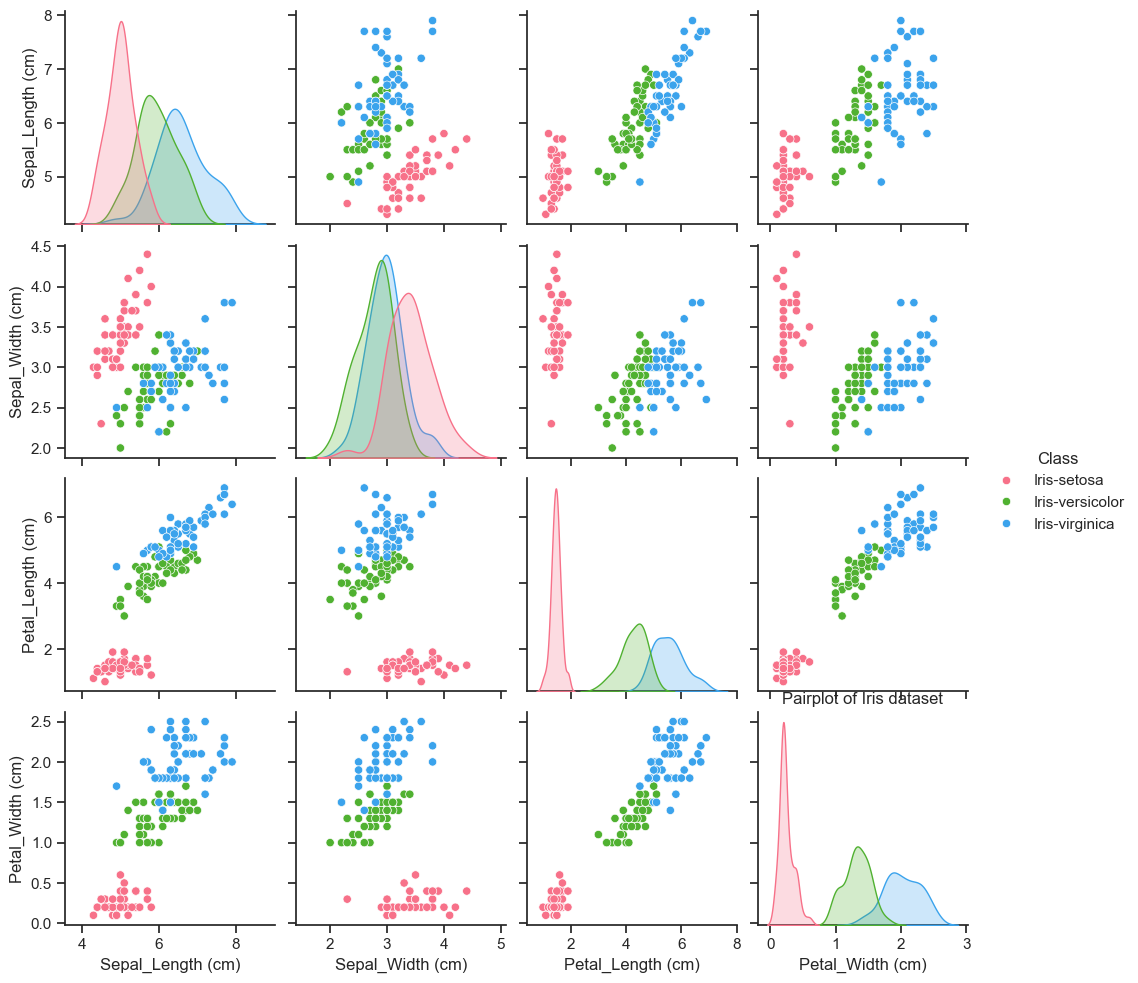

In [31]:
sns.set(style='ticks')
sns.pairplot(iris, hue='Class', palette='husl')
#plt.savefig('Pairplot of Iris dataset')

Upon examining the pairplot generated for the iris dataset, noteworthy observations emerge. The **Setosa class** stands notably *apart* from Versicolor and Virginica in all scatterplots, highlighting distinct characteristics unique to Setosa. Meanwhile, **Versicolor** and **Virginica** exhibit *more similarities* between them, although their combination of sepal and petal measurements enables differentiation. Nevertheless, it's evident that distinguishing these two classes isn't straightforward due to a degree of overlap in data points. The pairplot analysis not only reveals class distinctions but also prompts consideration of an important aspect in dataset analysis: regression.

#### Regression

### References

[1] Chugh v., (2023). "*Python pandas tutorial: The ultimate guide for beginners*".[Datacamp](https://www.datacamp.com/tutorial/pandas)

[2] Papers with code, (n.d.). "*iris*". [Papers with code](https://paperswithcode.com/dataset/iris-1#:~:text=for%20Spectral%20Clustering-,The%20Iris%20flower%20data%20set%20or%20Fisher's%20Iris%20data%20set,example%20of%20linear%20discriminant%20analysis.)

[3] Unzueta D., (2021). "*Fisher’s Linear Discriminant: Intuitively Explained*". [Towards Data Science](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb)

[4] Hadzhiev B., (2023). "*How to read a CSV file from a URL using Python [4 Ways]*". [bobbyhadz](https://bobbyhadz.com/blog/read-csv-file-from-url-using-python)

[5] Zach, (2023)."*Pandas: Set Column Names when Importing CSV File*". [Statology](https://www.statology.org/pandas-read-csv-column-name/)

[6] Shazra H., (2023). "*head () and tail () Functions Explained with Examples and Codes*". [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/)

[7] Pandas, (n.d.). "*pandas.DataFrame.shape*".[Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

[8] Raj P., (n.d.)."*Pandas – Get dataframe summary with info()*". [Data Science Parichay](https://datascienceparichay.com/article/pandas-get-dataframe-summary-with-info/)

[9] Pandas, (n.d.). "*Working with text data*". [Pandas](https://pandas.pydata.org/docs/user_guide/text.html)

[10] Data to Fish, (2021). "Select all Rows with NaN Values in Pandas DataFrame". [Data to Fish](https://datatofish.com/rows-with-nan-pandas-dataframe/)

[11] note.nkmk.me, (2021). "pandas: Find and remove duplicate rows of DataFrame, Series". [note.nkmk.me](https://note.nkmk.me/en/python-pandas-duplicated-drop-duplicates/#:~:text=You%20can%20count%20the%20number,counted%20with%20sum()%20method.&text=If%20you%20want%20to%20count,count%20True%20with%20sum()%20)

[12] UCLA: Statistical Consulting Group. (n.d.). “*WHAT IS THE DIFFERENCE BETWEEN CATEGORICAL, ORDINAL AND INTERVAL VARIABLES?*”. [Statistical Methods and Data Analytics](https://stats.oarc.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/)

[13] Zebra Bi, (2023). "*How to Customize Pie Chart in Python (matplotlib)*". [Zebra Bi](https://zebrabi.com/guide/how-to-customize-pie-chart-in-python-matplotlib/#:~:text=Pie%20charts%20are%20an%20effective,a%20few%20lines%20of%20code.)

[14] Siddharth M., (2023). "*How to Create a Bar Plot in Python: A Step-by-Step Guide (Updated 2023)*". [Analytics Vidya](https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/)

[15] W3School, (n.d.). "*Pandas DataFrame describe() Method*". [W3School](https://www.w3schools.com/python/pandas/ref_df_describe.asp)

[16] Koehrsen W., (2018). "*Histograms and Density Plots in Python*". [Towards Data Science](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)

[17] Galarnyk M., (2023). "*Understanding Boxplots*". [Built in](https://builtin.com/data-science/boxplot)

[18] Sarath SL, (2019). "*PAIRPLOT VISUALIZATION*". [Mediium](https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6)

### Additional readings

- Anderson E., (1935). "*The Irises of the Gaspe Penisula*". From AIS Bulletin #59, Missouri Botanical Garden.
- R. A. Fisher (1936). "*The use of multiple measurements in taxonomic problems*". Annals of Eugenics. 7 (2): 179–188.
- Geeks for Geeks, (n.d.). "*Matplotlib.pyplot.axvline() in Python*". [Geeks for Geeks](https://www.geeksforgeeks.org/matplotlib-pyplot-axvline-in-python/)

***
End